For my tweets I wanted to use something I am interested in (and is fun) as well as something I believe will consist of many different opinions. That's why I will focus on alleged break up between Taylor Swift and Joe Alwyn and rumours about 1975 frontman Matty Healy. My hashtags are: #taylorswift, #joealwyn, #mattyhealy.

I chose this because Taylor Swift's fandom is one of the biggest ever (many possible tweets), her fans are very dedicated and possessive of her and many of them were huge fans of her last relationship. Moreover, very problematic behaviour came to light of Taylor's alleged new man. This topic sparks a lot of discussion online it is very heated to say the least. I expect to retrieve tweets supporting Taylor anyway as well as criticising her choice and taste in men. For Joe I expect words of support and relief that relationship came to an end. When it comes to Matty, I suspect very angry and NSFW tweets from Taylor's side and some from his hardcore 1975 fans that will defend his actions.

***Installing necessary libraries***

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
!pip install git+https://github.com/JustAnotherArchivist/snscrape.git

  Cloning https://github.com/JustAnotherArchivist/snscrape.git to /tmp/pip-req-build-y7s5myv1
  Running command git clone --filter=blob:none --quiet https://github.com/JustAnotherArchivist/snscrape.git /tmp/pip-req-build-y7s5myv1
  Resolved https://github.com/JustAnotherArchivist/snscrape.git to commit 614d4c2029a62d348ca56598f87c425966aaec66
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done


In [5]:
!pip install snscrape

In [6]:
import snscrape
import pandas as pd
import snscrape.modules.twitter as sntwitter
from snscrape.modules.twitter import TwitterSearchScraper
import itertools
import numpy as np
import re
from datetime import datetime, timedelta


## ***Importing my hashtags and making a dataframe out of them***

I decided to get tweets from April 12 to May 12 as that was approximately the time this situation came up.

I decided to scrape 1500 tweets from each day. Scraping tweets for one hashtag takes me approximately 25 minutes.

In [ ]:

#Setting time period
start_date = datetime(2023, 4, 12)
end_date = datetime(2023, 5, 12)

df_taylor = pd.DataFrame(columns=['ID', 'Content', 'Datetime'])

current_date = start_date
while current_date <= end_date:
    next_date = current_date + timedelta(days=1)

    query = f'taylor swift lang:en since:{current_date.strftime("%Y-%m-%d")} until:{next_date.strftime("%Y-%m-%d")}'

    tweets = []
    for tweet in TwitterSearchScraper(query).get_items():
        tweets.append({'ID': tweet.id, 'Content': tweet.content, 'Datetime': tweet.date})

        if len(tweets) >= 1500:
            break

    df_taylor = df_taylor.append(pd.DataFrame(tweets), ignore_index=True)

    current_date = next_date




In [ ]:
from google.colab import files
df_taylor.to_csv('taylor.csv', encoding = 'utf-8-sig')
files.download('taylor.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
start_date = datetime(2023, 4, 12)
end_date = datetime(2023, 5, 12)

df_joe = pd.DataFrame(columns=['ID', 'Content', 'Datetime'])

current_date = start_date
while current_date <= end_date:
    next_date = current_date + timedelta(days=1)

    query = f'joe alwyn lang:en since:{current_date.strftime("%Y-%m-%d")} until:{next_date.strftime("%Y-%m-%d")}'

    tweets = []
    for tweet in TwitterSearchScraper(query).get_items():
        tweets.append({'ID': tweet.id, 'Content': tweet.content, 'Datetime': tweet.date})

        if len(tweets) >= 5000:
            break

    df_joe = df_joe.append(pd.DataFrame(tweets), ignore_index=True)

    current_date = next_date




In [ ]:
df_joe.to_csv('joe.csv', encoding = 'utf-8-sig')
files.download('joe.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
start_date = datetime(2023, 4, 12)
end_date = datetime(2023, 5, 12)

df_matty = pd.DataFrame(columns=['ID', 'Content', 'Datetime'])

current_date = start_date
while current_date <= end_date:
    next_date = current_date + timedelta(days=1)

    query = f'matty healy lang:en since:{current_date.strftime("%Y-%m-%d")} until:{next_date.strftime("%Y-%m-%d")}'

    tweets = []
    for tweet in TwitterSearchScraper(query).get_items():
        tweets.append({'ID': tweet.id, 'Content': tweet.content, 'Datetime': tweet.date})

        if len(tweets) >= 1500:
            break

    df_matty = df_matty.append(pd.DataFrame(tweets), ignore_index=True)

    current_date = next_date




In [ ]:
df_matty.to_csv('matty.csv', encoding = 'utf-8-sig')
files.download('matty.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
len(df_joe)

11587

In [ ]:
frames = [df_taylor, df_joe, df_matty]
df_all = pd.concat(frames)

In [ ]:
df_taylor = pd.read_csv("taylor.csv")
df_joe = pd.read_csv("joe.csv")
df_matty = pd.read_csv("matty.csv")

# ***Preprocessing***

From the tweets I want to delete user handles that are @ ed. I will also be removing special characters, numbers and punctuations.

I found that "@[\w]*" is the twitter handle pattern

In [ ]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt) #It returns a string where all matching occurrences of the specified pattern are replaced by the replace string.
                                                #'word' denotes the string/pattern that needs to be replaced.
                                                #"" denotes the string/pattern with which the pattern is replaced.
                                                #'input_txt denotes the string on which the re.sub() operation will be executed.

    return input_txt

In [ ]:
df_taylor['clean_tweet'] = np.vectorize(remove_pattern)(df_taylor['Content'], "@[\w]*")
df_joe['clean_tweet'] = np.vectorize(remove_pattern)(df_joe['Content'], "@[\w]*")
df_matty['clean_tweet'] = np.vectorize(remove_pattern)(df_matty['Content'], "@[\w]*")
df_all['clean_tweet'] = np.vectorize(remove_pattern)(df_all['Content'], "@[\w]*")

[^a-zA-Z#] is the parameter to remove all special characters, numbers and punctuations

In [ ]:
df_taylor['clean_tweet'] = df_taylor['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df_joe['clean_tweet'] = df_joe['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df_matty['clean_tweet'] = df_matty['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df_all['clean_tweet'] = df_all['clean_tweet'].str.replace("[^a-zA-Z#]", " ")

In [ ]:
df_all.head()

,Unnamed: 0,ID,Content,Datetime,clean_tweet
0,0,1646302143119343616,@bigbarbie11037 Total 1 hits:\nTaylor Swift: ...,2023-04-12 23:59:52+00:00,Total hits Taylor Swift number hits ...
1,1,1646302140007165953,Unboxing surprise! Taylor Swift Long Pond Stud...,2023-04-12 23:59:51+00:00,Unboxing surprise Taylor Swift Long Pond Stud...
2,2,1646302108713615360,"starlight by taylor swift, minute 2, second 24.",2023-04-12 23:59:44+00:00,starlight by taylor swift minute second
3,3,1646302076878635008,"December 9, 2014 “Blank Space” Victoria Secret...",2023-04-12 23:59:36+00:00,December Blank Space Victoria Secret...
4,4,1646302071019253761,@TheTitanBaddie The unnecessary Chloe thinkpie...,2023-04-12 23:59:35+00:00,The unnecessary Chloe thinkpieces are very dr...


## Tokenization is splitting up a larger body of text into smaller lines, words or even creating words for a non-English language.


In [ ]:
pip install nltk

In [ ]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')

In [ ]:
df_taylor['tokenized'] = df_taylor.apply(lambda row: nltk.word_tokenize(row['clean_tweet']), axis=1)
df_taylor['tokenized_length'] = df_taylor.apply(lambda row: len(row['tokenized']), axis=1)

df_joe['tokenized'] = df_joe.apply(lambda row: nltk.word_tokenize(row['clean_tweet']), axis=1)
df_joe['tokenized_length'] = df_joe.apply(lambda row: len(row['tokenized']), axis=1)

df_matty['tokenized'] = df_matty.apply(lambda row: nltk.word_tokenize(row['clean_tweet']), axis=1)
df_matty['tokenized_length'] = df_matty.apply(lambda row: len(row['tokenized']), axis=1)

df_all['tokenized'] = df_all.apply(lambda row: nltk.word_tokenize(row['clean_tweet']), axis=1)
df_all['tokenized_length'] = df_all.apply(lambda row: len(row['tokenized']), axis=1)

In [ ]:
df_taylor.head()

,Unnamed: 0,ID,Content,Datetime,clean_tweet,tokenized,tokenized_length
0,0,1646302143119343616,@bigbarbie11037 Total 1 hits:\nTaylor Swift: ...,2023-04-12 23:59:52+00:00,Total hits Taylor Swift number hits ...,"[Total, hits, Taylor, Swift, number, hits, Nic...",10
1,1,1646302140007165953,Unboxing surprise! Taylor Swift Long Pond Stud...,2023-04-12 23:59:51+00:00,Unboxing surprise Taylor Swift Long Pond Stud...,"[Unboxing, surprise, Taylor, Swift, Long, Pond...",45
2,2,1646302108713615360,"starlight by taylor swift, minute 2, second 24.",2023-04-12 23:59:44+00:00,starlight by taylor swift minute second,"[starlight, by, taylor, swift, minute, second]",6
3,3,1646302076878635008,"December 9, 2014 “Blank Space” Victoria Secret...",2023-04-12 23:59:36+00:00,December Blank Space Victoria Secret...,"[December, Blank, Space, Victoria, Secret, Fas...",39
4,4,1646302071019253761,@TheTitanBaddie The unnecessary Chloe thinkpie...,2023-04-12 23:59:35+00:00,The unnecessary Chloe thinkpieces are very dr...,"[The, unnecessary, Chloe, thinkpieces, are, ve...",31


## Stop words are a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore

In [ ]:
from nltk.corpus import stopwords

nltk.download('stopwords')

In [ ]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(sentence):
    word_tokens = word_tokenize(sentence)
    clean_tokens = [w for w in word_tokens if not w in stop_words]

    return clean_tokens



In [ ]:
df_taylor['without_stopwords'] = df_taylor['clean_tweet'].apply(remove_stopwords)
df_taylor['without_stopwords_length'] = df_taylor.apply(lambda row: len(row['without_stopwords']), axis=1)

df_joe['without_stopwords'] = df_joe['clean_tweet'].apply(remove_stopwords)
df_joe['without_stopwords_length'] = df_joe.apply(lambda row: len(row['without_stopwords']), axis=1)

df_matty['without_stopwords'] = df_matty['clean_tweet'].apply(remove_stopwords)
df_matty['without_stopwords_length'] = df_matty.apply(lambda row: len(row['without_stopwords']), axis=1)

df_all['without_stopwords'] = df_all['clean_tweet'].apply(remove_stopwords)
df_all['without_stopwords_length'] = df_all.apply(lambda row: len(row['without_stopwords']), axis=1)

df_taylor.head()

,Unnamed: 0,ID,Content,Datetime,clean_tweet,tokenized,tokenized_length,without_stopwords,without_stopwords_length
0,0,1646302143119343616,@bigbarbie11037 Total 1 hits:\nTaylor Swift: ...,2023-04-12 23:59:52+00:00,Total hits Taylor Swift number hits ...,"[Total, hits, Taylor, Swift, number, hits, Nic...",10,"[Total, hits, Taylor, Swift, number, hits, Nic...",10
1,1,1646302140007165953,Unboxing surprise! Taylor Swift Long Pond Stud...,2023-04-12 23:59:51+00:00,Unboxing surprise Taylor Swift Long Pond Stud...,"[Unboxing, surprise, Taylor, Swift, Long, Pond...",45,"[Unboxing, surprise, Taylor, Swift, Long, Pond...",40
2,2,1646302108713615360,"starlight by taylor swift, minute 2, second 24.",2023-04-12 23:59:44+00:00,starlight by taylor swift minute second,"[starlight, by, taylor, swift, minute, second]",6,"[starlight, taylor, swift, minute, second]",5
3,3,1646302076878635008,"December 9, 2014 “Blank Space” Victoria Secret...",2023-04-12 23:59:36+00:00,December Blank Space Victoria Secret...,"[December, Blank, Space, Victoria, Secret, Fas...",39,"[December, Blank, Space, Victoria, Secret, Fas...",38
4,4,1646302071019253761,@TheTitanBaddie The unnecessary Chloe thinkpie...,2023-04-12 23:59:35+00:00,The unnecessary Chloe thinkpieces are very dr...,"[The, unnecessary, Chloe, thinkpieces, are, ve...",31,"[The, unnecessary, Chloe, thinkpieces, drainin...",18


## Stemming is a technique used to reduce an inflected word down to its word stem



In [ ]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english")

In [ ]:
df_taylor['stemmed'] = df_taylor['without_stopwords'].apply(lambda x: [stemmer.stem(y) for y in x])
df_joe['stemmed'] = df_joe['without_stopwords'].apply(lambda x: [stemmer.stem(y) for y in x])
df_matty['stemmed'] = df_matty['without_stopwords'].apply(lambda x: [stemmer.stem(y) for y in x])
df_all['stemmed'] = df_all['without_stopwords'].apply(lambda x: [stemmer.stem(y) for y in x])

df_taylor.head()

,Unnamed: 0,ID,Content,Datetime,clean_tweet,tokenized,tokenized_length,without_stopwords,without_stopwords_length,stemmed
0,0,1646302143119343616,@bigbarbie11037 Total 1 hits:\nTaylor Swift: ...,2023-04-12 23:59:52+00:00,Total hits Taylor Swift number hits ...,"[Total, hits, Taylor, Swift, number, hits, Nic...",10,"[Total, hits, Taylor, Swift, number, hits, Nic...",10,"[total, hit, taylor, swift, number, hit, nicki..."
1,1,1646302140007165953,Unboxing surprise! Taylor Swift Long Pond Stud...,2023-04-12 23:59:51+00:00,Unboxing surprise Taylor Swift Long Pond Stud...,"[Unboxing, surprise, Taylor, Swift, Long, Pond...",45,"[Unboxing, surprise, Taylor, Swift, Long, Pond...",40,"[unbox, surpris, taylor, swift, long, pond, st..."
2,2,1646302108713615360,"starlight by taylor swift, minute 2, second 24.",2023-04-12 23:59:44+00:00,starlight by taylor swift minute second,"[starlight, by, taylor, swift, minute, second]",6,"[starlight, taylor, swift, minute, second]",5,"[starlight, taylor, swift, minut, second]"
3,3,1646302076878635008,"December 9, 2014 “Blank Space” Victoria Secret...",2023-04-12 23:59:36+00:00,December Blank Space Victoria Secret...,"[December, Blank, Space, Victoria, Secret, Fas...",39,"[December, Blank, Space, Victoria, Secret, Fas...",38,"[decemb, blank, space, victoria, secret, fashi..."
4,4,1646302071019253761,@TheTitanBaddie The unnecessary Chloe thinkpie...,2023-04-12 23:59:35+00:00,The unnecessary Chloe thinkpieces are very dr...,"[The, unnecessary, Chloe, thinkpieces, are, ve...",31,"[The, unnecessary, Chloe, thinkpieces, drainin...",18,"[the, unnecessari, chloe, thinkpiec, drain, ti..."


In [ ]:
df_taylor['stemmed sentence'] = df_taylor['stemmed'].apply(' '.join)
df_joe['stemmed sentence'] = df_joe['stemmed'].apply(' '.join)
df_matty['stemmed sentence'] = df_matty['stemmed'].apply(' '.join)
df_all['stemmed sentence'] = (df_all['stemmed'].apply(' '.join)).to_string()


# ***Sentiment analysis*** using NLTK Vader

In [ ]:
pip install vaderSentiment

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
vader = SentimentIntensityAnalyzer()

df_taylor['compound'] = [vader.polarity_scores(x)['compound'] for x in df_taylor['clean_tweet']]
df_joe['compound'] = [vader.polarity_scores(x)['compound'] for x in df_joe['clean_tweet']]
df_matty['compound'] = [vader.polarity_scores(x)['compound'] for x in df_matty['clean_tweet']]
df_all['compound'] = [vader.polarity_scores(x)['compound'] for x in df_all['clean_tweet']]

df_taylor.head()

,Unnamed: 0,ID,Content,Datetime,clean_tweet,tokenized,tokenized_length,without_stopwords,without_stopwords_length,stemmed,stemmed sentence,compound
0,0,1646302143119343616,@bigbarbie11037 Total 1 hits:\nTaylor Swift: ...,2023-04-12 23:59:52+00:00,Total hits Taylor Swift number hits ...,"[Total, hits, Taylor, Swift, number, hits, Nic...",10,"[Total, hits, Taylor, Swift, number, hits, Nic...",10,"[total, hit, taylor, swift, number, hit, nicki...",total hit taylor swift number hit nicki minaj ...,0.3947
1,1,1646302140007165953,Unboxing surprise! Taylor Swift Long Pond Stud...,2023-04-12 23:59:51+00:00,Unboxing surprise Taylor Swift Long Pond Stud...,"[Unboxing, surprise, Taylor, Swift, Long, Pond...",45,"[Unboxing, surprise, Taylor, Swift, Long, Pond...",40,"[unbox, surpris, taylor, swift, long, pond, st...",unbox surpris taylor swift long pond studio se...,0.4404
2,2,1646302108713615360,"starlight by taylor swift, minute 2, second 24.",2023-04-12 23:59:44+00:00,starlight by taylor swift minute second,"[starlight, by, taylor, swift, minute, second]",6,"[starlight, taylor, swift, minute, second]",5,"[starlight, taylor, swift, minut, second]",starlight taylor swift minut second,0.2023
3,3,1646302076878635008,"December 9, 2014 “Blank Space” Victoria Secret...",2023-04-12 23:59:36+00:00,December Blank Space Victoria Secret...,"[December, Blank, Space, Victoria, Secret, Fas...",39,"[December, Blank, Space, Victoria, Secret, Fas...",38,"[decemb, blank, space, victoria, secret, fashi...",decemb blank space victoria secret fashion sho...,0.7717
4,4,1646302071019253761,@TheTitanBaddie The unnecessary Chloe thinkpie...,2023-04-12 23:59:35+00:00,The unnecessary Chloe thinkpieces are very dr...,"[The, unnecessary, Chloe, thinkpieces, are, ve...",31,"[The, unnecessary, Chloe, thinkpieces, drainin...",18,"[the, unnecessari, chloe, thinkpiec, drain, ti...",the unnecessari chloe thinkpiec drain tire if ...,0.3189


I want to make another column that will be deciding wether tweet was positive (ve>0.05), negative (ve<-0.05) or neutral.

In [ ]:
def sentiment(row):
  if row['compound'] > 0.05:
      return 'positive'
  if row['compound'] < -0.05:
      return 'negative'
  else:
    return 'neutral'


df_taylor['sentiment'] = df_taylor.apply (lambda row: sentiment(row), axis=1)
df_joe['sentiment'] = df_joe.apply (lambda row: sentiment(row), axis=1)
df_matty['sentiment'] = df_matty.apply (lambda row: sentiment(row), axis=1)
df_all['sentiment'] = df_all.apply (lambda row: sentiment(row), axis=1)
df_taylor.head()

,Unnamed: 0,ID,Content,Datetime,clean_tweet,tokenized,tokenized_length,without_stopwords,without_stopwords_length,stemmed,stemmed sentence,compound,sentiment
0,0,1646302143119343616,@bigbarbie11037 Total 1 hits:\nTaylor Swift: ...,2023-04-12 23:59:52+00:00,Total hits Taylor Swift number hits ...,"[Total, hits, Taylor, Swift, number, hits, Nic...",10,"[Total, hits, Taylor, Swift, number, hits, Nic...",10,"[total, hit, taylor, swift, number, hit, nicki...",total hit taylor swift number hit nicki minaj ...,0.3947,positive
1,1,1646302140007165953,Unboxing surprise! Taylor Swift Long Pond Stud...,2023-04-12 23:59:51+00:00,Unboxing surprise Taylor Swift Long Pond Stud...,"[Unboxing, surprise, Taylor, Swift, Long, Pond...",45,"[Unboxing, surprise, Taylor, Swift, Long, Pond...",40,"[unbox, surpris, taylor, swift, long, pond, st...",unbox surpris taylor swift long pond studio se...,0.4404,positive
2,2,1646302108713615360,"starlight by taylor swift, minute 2, second 24.",2023-04-12 23:59:44+00:00,starlight by taylor swift minute second,"[starlight, by, taylor, swift, minute, second]",6,"[starlight, taylor, swift, minute, second]",5,"[starlight, taylor, swift, minut, second]",starlight taylor swift minut second,0.2023,positive
3,3,1646302076878635008,"December 9, 2014 “Blank Space” Victoria Secret...",2023-04-12 23:59:36+00:00,December Blank Space Victoria Secret...,"[December, Blank, Space, Victoria, Secret, Fas...",39,"[December, Blank, Space, Victoria, Secret, Fas...",38,"[decemb, blank, space, victoria, secret, fashi...",decemb blank space victoria secret fashion sho...,0.7717,positive
4,4,1646302071019253761,@TheTitanBaddie The unnecessary Chloe thinkpie...,2023-04-12 23:59:35+00:00,The unnecessary Chloe thinkpieces are very dr...,"[The, unnecessary, Chloe, thinkpieces, are, ve...",31,"[The, unnecessary, Chloe, thinkpieces, drainin...",18,"[the, unnecessari, chloe, thinkpiec, drain, ti...",the unnecessari chloe thinkpiec drain tire if ...,0.3189,positive


I will count occurrences of each sentiment for every person.

<Axes: >

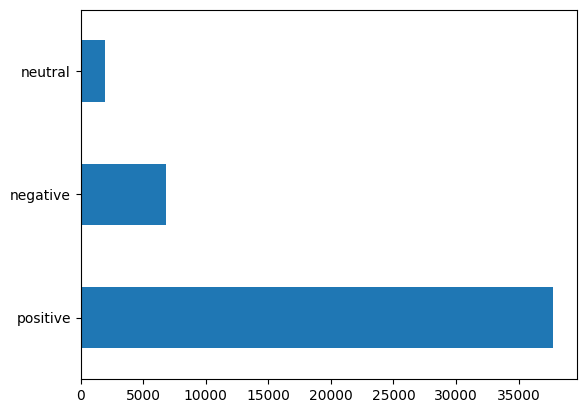

In [ ]:
val_tay=df_taylor['sentiment'].value_counts()
df_taylor['sentiment'].value_counts().plot(kind='barh')

In [ ]:
value_counts_taylor = pd.DataFrame(val_tay)
value_counts_taylor

,sentiment
positive,37744
negative,6803
neutral,1953


<Axes: >

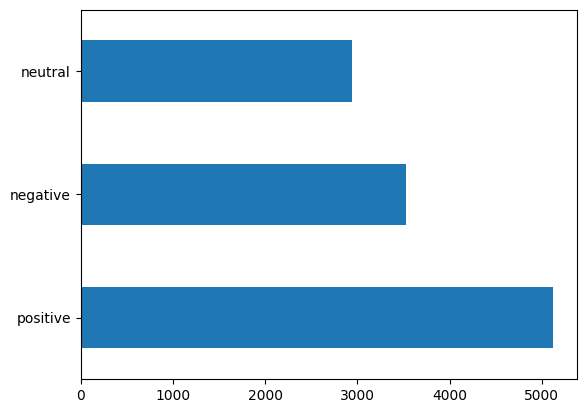

In [ ]:
val_joe=df_joe['sentiment'].value_counts()
df_joe['sentiment'].value_counts().plot(kind='barh')

In [ ]:
value_counts_joe = pd.DataFrame(val_joe)
value_counts_joe

,sentiment
positive,5120
negative,3525
neutral,2944


<Axes: >

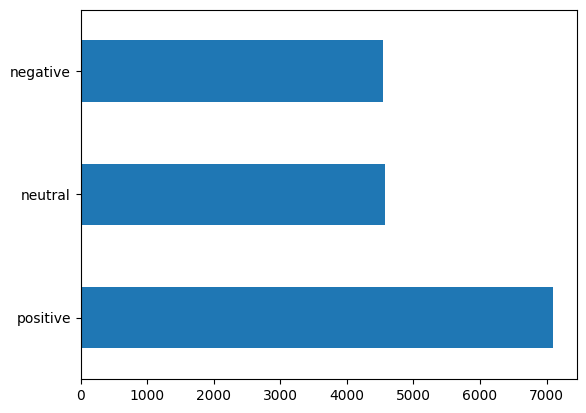

In [ ]:
val_mat=df_matty['sentiment'].value_counts()
df_matty['sentiment'].value_counts().plot(kind='barh')

In [ ]:
value_counts_matty = pd.DataFrame(val_mat)
value_counts_matty

,sentiment
positive,7097
neutral,4571
negative,4537


In [ ]:
vals = ({'taylor': [value_counts_taylor['sentiment'][0], value_counts_taylor['sentiment'][1], value_counts_taylor['sentiment'][2]],
                    'joe': [value_counts_joe['sentiment'][2], value_counts_joe['sentiment'][1], value_counts_joe['sentiment'][0]],
                    'matty': [value_counts_matty['sentiment'][0], value_counts_matty['sentiment'][2], value_counts_matty['sentiment'][1]]})

index_labels=['positive','negative','neutral']
vals = pd.DataFrame(vals,index=index_labels)
vals

,taylor,joe,matty
positive,37744,2944,7097
negative,6803,3525,4537
neutral,1953,5120,4571


<Axes: >

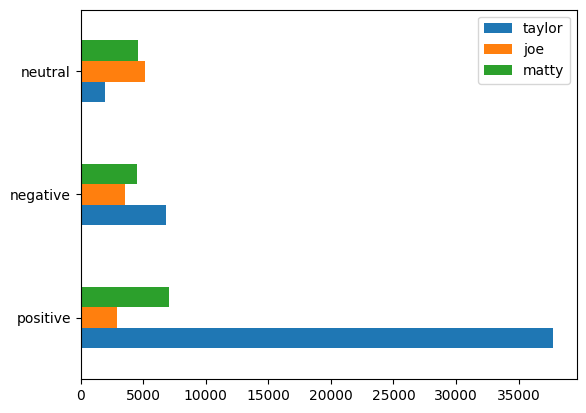

In [ ]:
vals.plot.barh()

## ***Sentiment analysis*** using NRC Lexicon

This module consist of 10 sentiments and emotions: fear, anger, anticipation, trust, surprise, positive, negative, sadness, disgust, joy.


As it is not very popular module I got help from: https://www.kaggle.com/code/vickieshi/news-headline-sentiment-analysis

In [ ]:
pip install NRCLex

In [ ]:
from nrclex import NRCLex

In [ ]:
def emotion_freq(text):
    emotions = {'anger': 0.0, 'fear': 0.0, 'negative': 0.0, 'positive': 0.0, 'sadness': 0.0, 'trust': 0.0, 'anticipation': 0.0, 'joy': 0.0, 'disgust': 0.0, 'surprise': 0.0}
    text = NRCLex(text)
    freq = text.affect_frequencies
    for k, fq in freq.items():
      emotions[k] = emotions.get(k, 0.0) + fq #gives frequency of every emotion
    return emotions

In [ ]:
df_taylor['emo_freq']=df_taylor['clean_tweet'].apply(emotion_freq)
df_joe['emo_freq']=df_joe['clean_tweet'].apply(emotion_freq)
df_matty['emo_freq']=df_matty['clean_tweet'].apply(emotion_freq)
df_all['emo_freq']=df_all['clean_tweet'].apply(emotion_freq)
df_taylor.head()

,Unnamed: 0,ID,Content,Datetime,clean_tweet,tokenized,tokenized_length,without_stopwords,without_stopwords_length,stemmed,stemmed sentence,compound,sentiment,emo_freq
0,0,1646302143119343616,@bigbarbie11037 Total 1 hits:\nTaylor Swift: ...,2023-04-12 23:59:52+00:00,Total hits Taylor Swift number hits ...,"[Total, hits, Taylor, Swift, number, hits, Nic...",10,"[Total, hits, Taylor, Swift, number, hits, Nic...",10,"[total, hit, taylor, swift, number, hit, nicki...",total hit taylor swift number hit nicki minaj ...,0.3947,positive,"{'anger': 0.0, 'fear': 0.0, 'negative': 0.0, '..."
1,1,1646302140007165953,Unboxing surprise! Taylor Swift Long Pond Stud...,2023-04-12 23:59:51+00:00,Unboxing surprise Taylor Swift Long Pond Stud...,"[Unboxing, surprise, Taylor, Swift, Long, Pond...",45,"[Unboxing, surprise, Taylor, Swift, Long, Pond...",40,"[unbox, surpris, taylor, swift, long, pond, st...",unbox surpris taylor swift long pond studio se...,0.4404,positive,"{'anger': 0.125, 'fear': 0.125, 'negative': 0...."
2,2,1646302108713615360,"starlight by taylor swift, minute 2, second 24.",2023-04-12 23:59:44+00:00,starlight by taylor swift minute second,"[starlight, by, taylor, swift, minute, second]",6,"[starlight, taylor, swift, minute, second]",5,"[starlight, taylor, swift, minut, second]",starlight taylor swift minut second,0.2023,positive,"{'anger': 0.0, 'fear': 0.0, 'negative': 0.0, '..."
3,3,1646302076878635008,"December 9, 2014 “Blank Space” Victoria Secret...",2023-04-12 23:59:36+00:00,December Blank Space Victoria Secret...,"[December, Blank, Space, Victoria, Secret, Fas...",39,"[December, Blank, Space, Victoria, Secret, Fas...",38,"[decemb, blank, space, victoria, secret, fashi...",decemb blank space victoria secret fashion sho...,0.7717,positive,"{'anger': 0.0, 'fear': 0.16666666666666666, 'n..."
4,4,1646302071019253761,@TheTitanBaddie The unnecessary Chloe thinkpie...,2023-04-12 23:59:35+00:00,The unnecessary Chloe thinkpieces are very dr...,"[The, unnecessary, Chloe, thinkpieces, are, ve...",31,"[The, unnecessary, Chloe, thinkpieces, drainin...",18,"[the, unnecessari, chloe, thinkpiec, drain, ti...",the unnecessari chloe thinkpiec drain tire if ...,0.3189,positive,"{'anger': 0.0, 'fear': 0.16666666666666666, 'n..."


In [ ]:
df_taylor = pd.concat((df_taylor.drop(['emo_freq'],axis=1), df_taylor['emo_freq'].apply(pd.Series)), axis=1)
df_joe = pd.concat((df_joe.drop(['emo_freq'],axis=1), df_joe['emo_freq'].apply(pd.Series)), axis=1)
df_matty = pd.concat((df_matty.drop(['emo_freq'],axis=1), df_matty['emo_freq'].apply(pd.Series)), axis=1)
df_all = pd.concat((df_all.drop(['emo_freq'],axis=1), df_all['emo_freq'].apply(pd.Series)), axis=1)

df_taylor.head()

,Unnamed: 0,ID,Content,Datetime,clean_tweet,tokenized,tokenized_length,without_stopwords,without_stopwords_length,stemmed,...,fear,negative,positive,sadness,trust,anticipation,joy,disgust,surprise,anticip
0,0,1646302143119343616,@bigbarbie11037 Total 1 hits:\nTaylor Swift: ...,2023-04-12 23:59:52+00:00,Total hits Taylor Swift number hits ...,"[Total, hits, Taylor, Swift, number, hits, Nic...",10,"[Total, hits, Taylor, Swift, number, hits, Nic...",10,"[total, hit, taylor, swift, number, hit, nicki...",...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000,0.0
1,1,1646302140007165953,Unboxing surprise! Taylor Swift Long Pond Stud...,2023-04-12 23:59:51+00:00,Unboxing surprise Taylor Swift Long Pond Stud...,"[Unboxing, surprise, Taylor, Swift, Long, Pond...",45,"[Unboxing, surprise, Taylor, Swift, Long, Pond...",40,"[unbox, surpris, taylor, swift, long, pond, st...",...,0.125000,0.250000,0.125000,0.000000,0.000000,0.125000,0.125000,0.0,0.125,0.0
2,2,1646302108713615360,"starlight by taylor swift, minute 2, second 24.",2023-04-12 23:59:44+00:00,starlight by taylor swift minute second,"[starlight, by, taylor, swift, minute, second]",6,"[starlight, taylor, swift, minute, second]",5,"[starlight, taylor, swift, minut, second]",...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000,0.0
3,3,1646302076878635008,"December 9, 2014 “Blank Space” Victoria Secret...",2023-04-12 23:59:36+00:00,December Blank Space Victoria Secret...,"[December, Blank, Space, Victoria, Secret, Fas...",39,"[December, Blank, Space, Victoria, Secret, Fas...",38,"[decemb, blank, space, victoria, secret, fashi...",...,0.166667,0.000000,0.333333,0.000000,0.166667,0.166667,0.166667,0.0,0.000,0.0
4,4,1646302071019253761,@TheTitanBaddie The unnecessary Chloe thinkpie...,2023-04-12 23:59:35+00:00,The unnecessary Chloe thinkpieces are very dr...,"[The, unnecessary, Chloe, thinkpieces, are, ve...",31,"[The, unnecessary, Chloe, thinkpieces, drainin...",18,"[the, unnecessari, chloe, thinkpiec, drain, ti...",...,0.166667,0.166667,0.333333,0.166667,0.166667,0.000000,0.000000,0.0,0.000,0.0


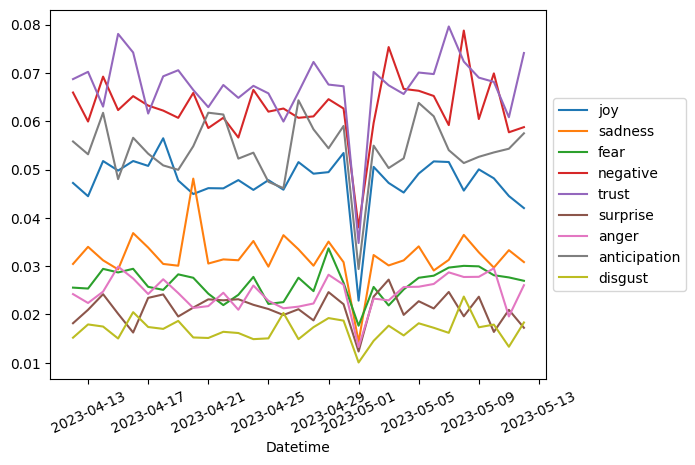

In [ ]:
import matplotlib.pyplot as plt
df_taylor['Datetime'] = pd.to_datetime(df_taylor['Datetime'], errors='coerce')

df_taylor.groupby(df_taylor['Datetime'].dt.date)["joy"].mean().plot(kind="line",rot=25)
df_taylor.groupby(df_taylor['Datetime'].dt.date)["sadness"].mean().plot(kind="line",rot=25)
df_taylor.groupby(df_taylor['Datetime'].dt.date)["fear"].mean().plot(kind="line",rot=25)
df_taylor.groupby(df_taylor['Datetime'].dt.date)["negative"].mean().plot(kind="line",rot=25)
df_taylor.groupby(df_taylor['Datetime'].dt.date)["trust"].mean().plot(kind="line",rot=25)
df_taylor.groupby(df_taylor['Datetime'].dt.date)["surprise"].mean().plot(kind="line",rot=25)
df_taylor.groupby(df_taylor['Datetime'].dt.date)["anger"].mean().plot(kind="line",rot=25)
df_taylor.groupby(df_taylor['Datetime'].dt.date)["anticipation"].mean().plot(kind="line",rot=25)
df_taylor.groupby(df_taylor['Datetime'].dt.date)["disgust"].mean().plot(kind="line",rot=25)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

My theory about April 29th drop is lyrics of Taylor Swift's song 'You're on your own kid' which are 'do you really wanna know where I was April 29th?'. I imagine fans mostly tweeted these lyrics so they were mostly neutral.

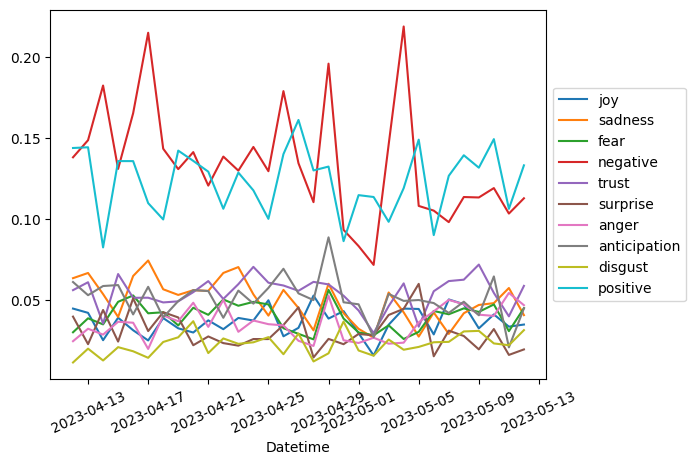

In [ ]:
df_joe['Datetime'] = pd.to_datetime(df_joe['Datetime'], errors='coerce')


df_joe.groupby(df_joe['Datetime'].dt.date)["joy"].mean().plot(kind="line",rot=25)
df_joe.groupby(df_joe['Datetime'].dt.date)["sadness"].mean().plot(kind="line",rot=25)
df_joe.groupby(df_joe['Datetime'].dt.date)["fear"].mean().plot(kind="line",rot=25)
df_joe.groupby(df_joe['Datetime'].dt.date)["negative"].mean().plot(kind="line",rot=25)
df_joe.groupby(df_joe['Datetime'].dt.date)["trust"].mean().plot(kind="line",rot=25)
df_joe.groupby(df_joe['Datetime'].dt.date)["surprise"].mean().plot(kind="line",rot=25)
df_joe.groupby(df_joe['Datetime'].dt.date)["anger"].mean().plot(kind="line",rot=25)
df_joe.groupby(df_joe['Datetime'].dt.date)["anticipation"].mean().plot(kind="line",rot=25)
df_joe.groupby(df_joe['Datetime'].dt.date)["disgust"].mean().plot(kind="line",rot=25)
df_joe.groupby(df_joe['Datetime'].dt.date)["positive"].mean().plot(kind="line",rot=25)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))



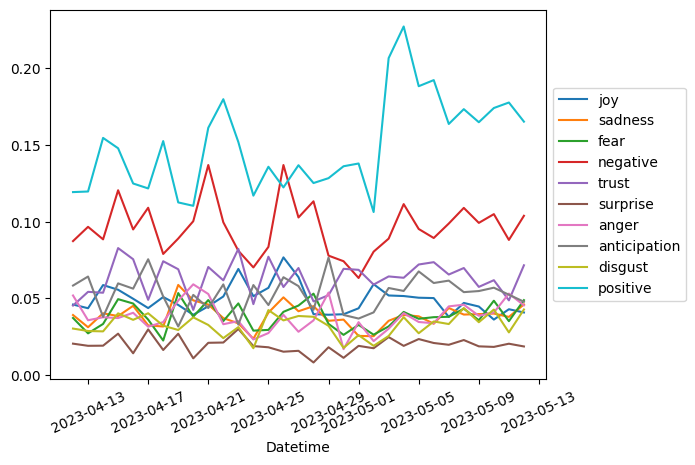

In [ ]:
df_matty['Datetime'] = pd.to_datetime(df_matty['Datetime'], errors='coerce')


df_matty.groupby(df_matty['Datetime'].dt.date)["joy"].mean().plot(kind="line",rot=25)
df_matty.groupby(df_matty['Datetime'].dt.date)["sadness"].mean().plot(kind="line",rot=25)
df_matty.groupby(df_matty['Datetime'].dt.date)["fear"].mean().plot(kind="line",rot=25)
df_matty.groupby(df_matty['Datetime'].dt.date)["negative"].mean().plot(kind="line",rot=25)
df_matty.groupby(df_matty['Datetime'].dt.date)["trust"].mean().plot(kind="line",rot=25)
df_matty.groupby(df_matty['Datetime'].dt.date)["surprise"].mean().plot(kind="line",rot=25)
df_matty.groupby(df_matty['Datetime'].dt.date)["anger"].mean().plot(kind="line",rot=25)
df_matty.groupby(df_matty['Datetime'].dt.date)["anticipation"].mean().plot(kind="line",rot=25)
df_matty.groupby(df_matty['Datetime'].dt.date)["disgust"].mean().plot(kind="line",rot=25)
df_matty.groupby(df_matty['Datetime'].dt.date)["positive"].mean().plot(kind="line",rot=25)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))




I am surprised about such large amount of positive tweets but as I sad 1975's fan base is also really big and as it seems - dedicated.

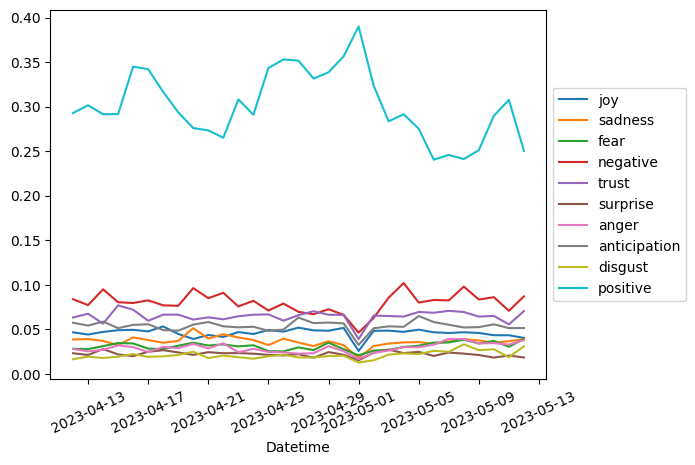

In [ ]:
df_all['Datetime'] = pd.to_datetime(df_all['Datetime'], errors='coerce')

df_all.groupby(df_all['Datetime'].dt.date)["joy"].mean().plot(kind="line",rot=25)
df_all.groupby(df_all['Datetime'].dt.date)["sadness"].mean().plot(kind="line",rot=25)
df_all.groupby(df_all['Datetime'].dt.date)["fear"].mean().plot(kind="line",rot=25)
df_all.groupby(df_all['Datetime'].dt.date)["negative"].mean().plot(kind="line",rot=25)
df_all.groupby(df_all['Datetime'].dt.date)["trust"].mean().plot(kind="line",rot=25)
df_all.groupby(df_all['Datetime'].dt.date)["surprise"].mean().plot(kind="line",rot=25)
df_all.groupby(df_all['Datetime'].dt.date)["anger"].mean().plot(kind="line",rot=25)
df_all.groupby(df_all['Datetime'].dt.date)["anticipation"].mean().plot(kind="line",rot=25)
df_all.groupby(df_all['Datetime'].dt.date)["disgust"].mean().plot(kind="line",rot=25)
df_all.groupby(df_all['Datetime'].dt.date)["positive"].mean().plot(kind="line",rot=25)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


<Axes: xlabel='Datetime'>

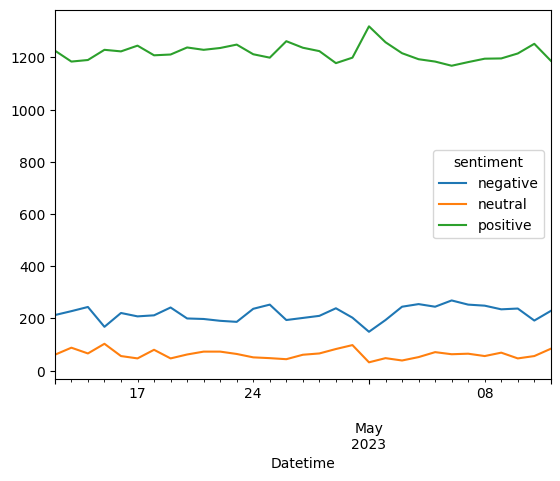

In [ ]:
df_taylor.groupby(pd.Grouper(key='Datetime', freq='d'))['sentiment'].value_counts().unstack(level=1).plot()

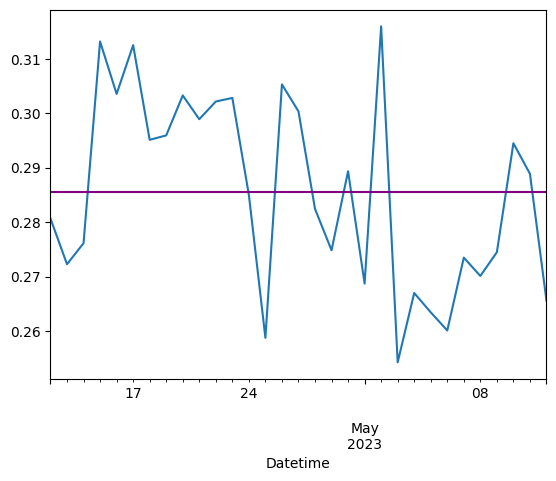

In [ ]:
ax = df_taylor.groupby(pd.Grouper(key='Datetime', freq='d'))['compound'].mean().plot()
mean_taylor = float(round(numpy.mean(df_taylor['compound']), 5))
plt.axhline(mean_taylor, color='purple', linestyle='-')


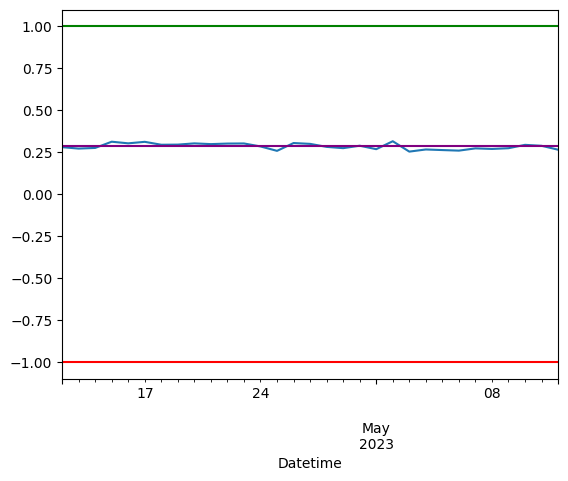

In [ ]:

import numpy

ax = df_taylor.groupby(pd.Grouper(key='Datetime', freq='d'))['compound'].mean().plot()
mean_taylor = float(round(numpy.mean(df_taylor['compound']), 5))
plt.axhline(mean_taylor, color='purple', linestyle='-')
plt.axhline(-1, color='red', linestyle='-')
plt.axhline(1, color='green', linestyle='-')

plt.show()


<Axes: xlabel='Datetime'>

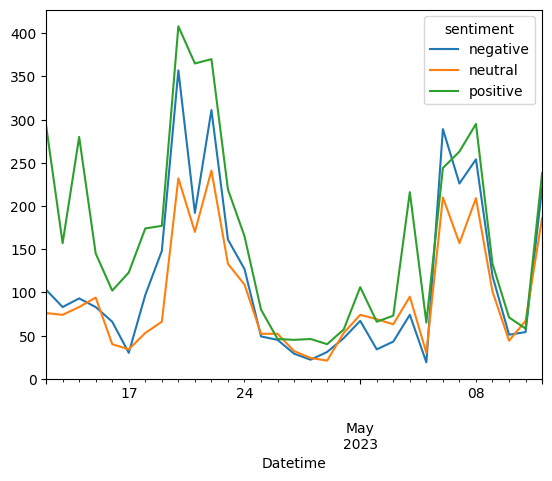

In [ ]:
df_joe.groupby(pd.Grouper(key='Datetime', freq='d'))['sentiment'].value_counts().unstack(level=1).plot()

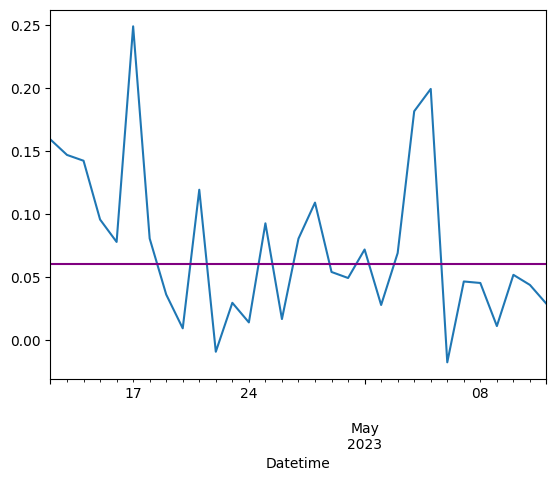

In [ ]:
ax = df_joe.groupby(pd.Grouper(key='Datetime', freq='d'))['compound'].mean().plot()
mean_joe = float(round(numpy.mean(df_joe['compound']), 5))
plt.axhline(mean_joe, color='purple', linestyle='-')

plt.show()

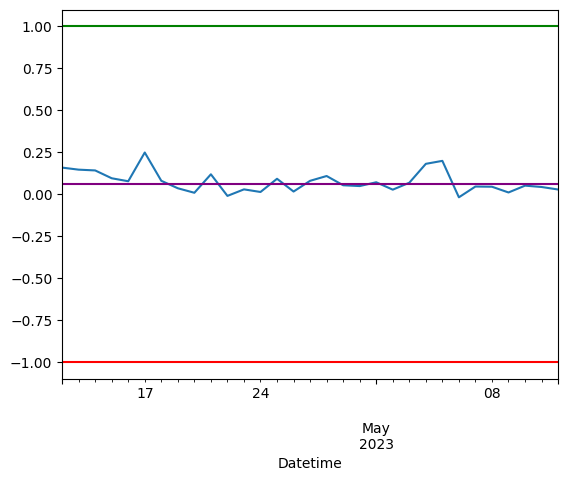

In [ ]:
ax = df_joe.groupby(pd.Grouper(key='Datetime', freq='d'))['compound'].mean().plot()
mean_joe = float(round(numpy.mean(df_joe['compound']), 5))
plt.axhline(mean_joe, color='purple', linestyle='-')
plt.axhline(-1, color='red', linestyle='-')
plt.axhline(1, color='green', linestyle='-')

plt.show()

<Axes: xlabel='Datetime'>

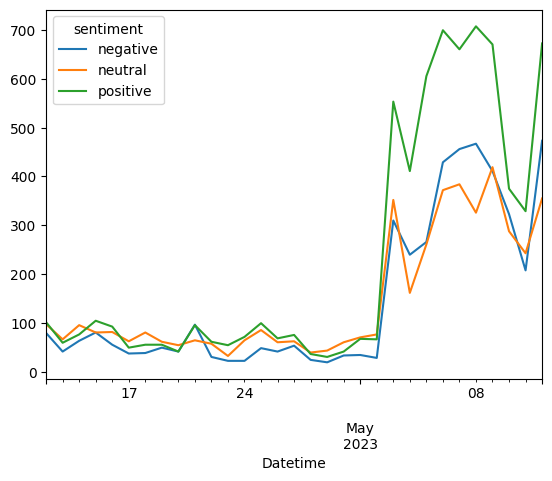

In [ ]:
df_matty.groupby(pd.Grouper(key='Datetime', freq='d'))['sentiment'].value_counts().unstack(level=1).plot()

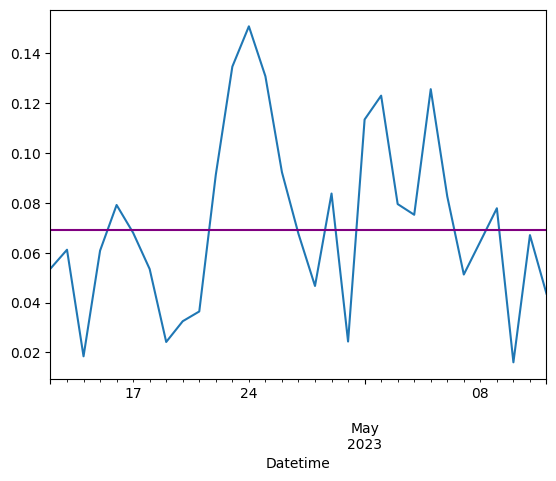

In [ ]:
ax = df_matty.groupby(pd.Grouper(key='Datetime', freq='d'))['compound'].mean().plot()
mean_matty = float(round(numpy.mean(df_matty['compound']), 5))
plt.axhline(mean_matty, color='purple', linestyle='-')

plt.show()

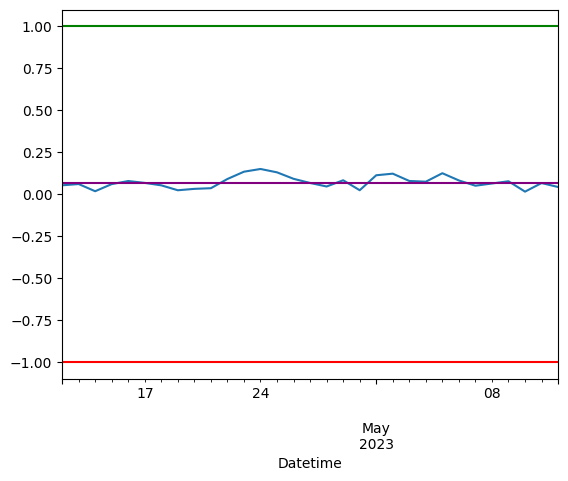

In [ ]:
ax = df_matty.groupby(pd.Grouper(key='Datetime', freq='d'))['compound'].mean().plot()
mean_matty = float(round(numpy.mean(df_matty['compound']), 5))
plt.axhline(mean_matty, color='purple', linestyle='-')
plt.axhline(-1, color='red', linestyle='-')
plt.axhline(1, color='green', linestyle='-')

plt.show()

Surge of tweets on May 2nd might be caused by this year's Met Gala which Taylor didn't attend. I assume many people were surprised by not seeing her there. Next surge is probably because of annoucement of re recording release of her third album 'Speak Now' which occured on May 5th.

<Axes: xlabel='Datetime'>

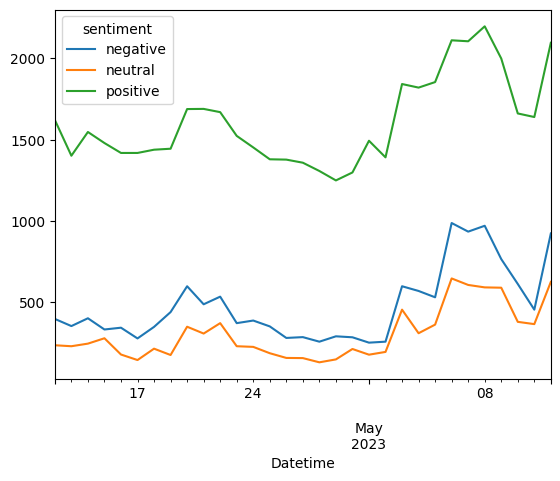

In [ ]:
df_all.groupby(pd.Grouper(key='Datetime', freq='d'))['sentiment'].value_counts().unstack(level=1).plot()

In [ ]:
df_matty.to_csv('matty_clean.csv', encoding = 'utf-8-sig')
files.download('matty_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_taylor.to_csv('taylor_clean.csv', encoding = 'utf-8-sig')
files.download('taylor_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_joe.to_csv('joe_clean.csv', encoding = 'utf-8-sig')
files.download('joe_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>